In [1]:
# fmt: off
COORDS = [
    (456, 320),  # location 0 - the depot
    (228, 0),    # location 1
    (912, 0),    # location 2
    (0, 80),     # location 3
    (114, 80),   # location 4
    (570, 160),  # location 5
    (798, 160),  # location 6
    (342, 240),  # location 7
    (684, 240),  # location 8
    (570, 400),  # location 9
    (912, 400),  # location 10
    (114, 480),  # location 11
    (228, 480),  # location 12
    (342, 560),  # location 13
    (684, 560),  # location 14
    (0, 640),    # location 15
    (798, 640),  # location 16
]
DEMANDS = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
# fmt: on


In [2]:
from pyvrp import Model

m = Model()
m.add_vehicle_type(4, capacity=15)
depot = m.add_depot(x=COORDS[0][0], y=COORDS[0][1])
clients = [
    m.add_client(x=COORDS[idx][0], y=COORDS[idx][1], delivery=DEMANDS[idx])
    for idx in range(1, len(COORDS))
]

locations = [depot] + clients
for frm in locations:
    for to in locations:
        distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan
        m.add_edge(frm, to, distance=distance)


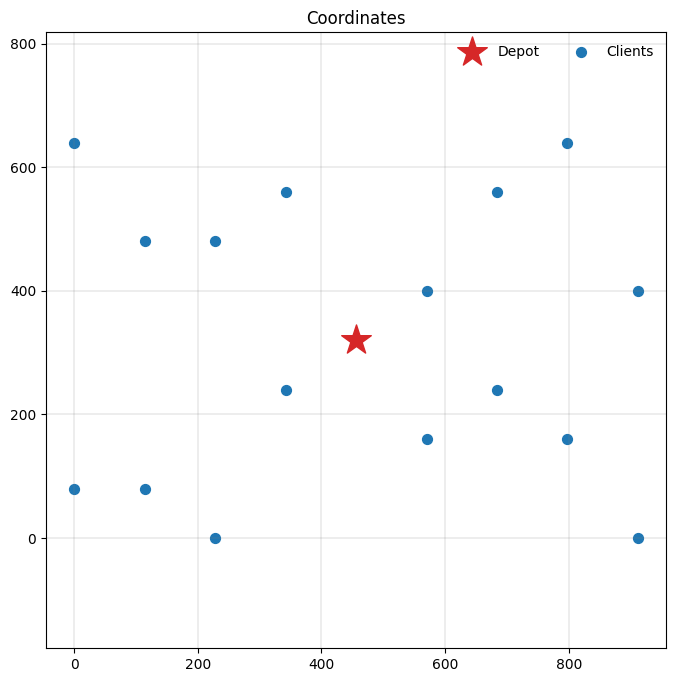

In [3]:
import matplotlib.pyplot as plt

from pyvrp.plotting import plot_coordinates

_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(m.data(), ax=ax)


In [4]:
from pyvrp.stop import MaxRuntime

res = m.solve(stop=MaxRuntime(1), display=True)  # one second


PyVRP v0.10.1

Solving an instance with:
    1 depot
    16 clients
    4 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      0s |  36     6240     6208 |  47     6608     5274
     1000      0s |  36     6229     6208 |  55     6697     6093
     1500      1s |  45     6219     6208 |  57     6421     5754

Search terminated in 1.00s after 1960 iterations.
Best-found solution has cost 6208.

Solution results
    # routes: 4
   # clients: 16
   objective: 6208
    distance: 6208
    duration: 0
# iterations: 1960
    run-time: 1.00 seconds



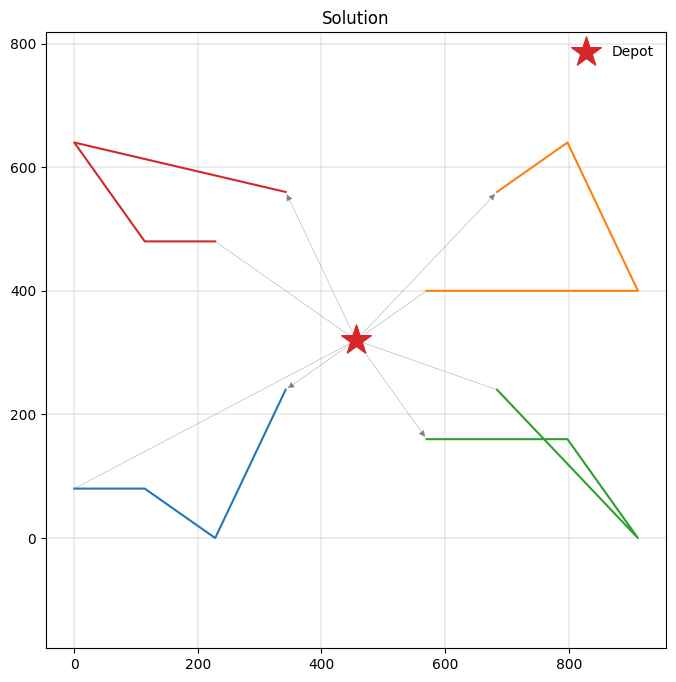

In [5]:
from pyvrp.plotting import plot_solution

_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)

In [3]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from vrplib import read_solution

from pyvrp import Model, read
from pyvrp.plotting import (
    plot_coordinates,
    plot_instance,
    plot_result,
    plot_route_schedule,
)
from pyvrp.stop import MaxIterations, MaxRuntime

In [70]:
INSTANCE = read("../data/benchmark/MDVRPTW/PR11A.vrp", round_func="round")
BKS = read_solution("../data/benchmark/MDVRPTW/PR11A.sol")

In [71]:
BKS

{'routes': [[160, 122, 220],
  [19, 93, 100, 119, 10, 308, 321, 354, 78, 129, 238, 86, 130, 135],
  [140, 75, 180, 13, 94, 269, 182, 150, 267, 35, 139, 344, 331],
  [288, 170, 149, 73, 172, 46, 352, 196, 225, 313, 128],
  [230, 45, 251, 21, 64, 353, 112, 255, 204, 158, 163, 332],
  [198, 106, 323, 306, 216, 348, 174, 52, 340, 154, 29, 31, 254],
  [62, 258, 97, 209, 211, 350, 152, 315, 249, 161, 325, 40],
  [318, 289, 14, 157, 110, 273, 85, 164, 193, 77, 316, 324],
  [],
  [],
  [221, 256, 301, 244, 68, 194, 310],
  [111, 133, 223, 278, 54, 245, 6, 41, 103, 113, 305, 260],
  [241, 71, 83, 299, 276, 117, 15, 44, 287, 186, 213, 33],
  [349, 222, 4, 125, 208, 236, 82, 358, 343, 181, 69, 201, 263, 63, 7],
  [242, 298, 104, 12, 138, 270, 168, 214, 341, 151, 253, 330, 176, 26],
  [361, 362, 266, 197, 96, 335, 165, 320, 339, 227, 342, 34],
  [290, 56, 120, 16, 277, 248, 55, 43, 118, 283, 47, 23, 184],
  [171, 90, 17, 11, 156, 300, 314, 265, 206, 296, 351, 200, 250],
  [105, 84, 337, 234, 124, 

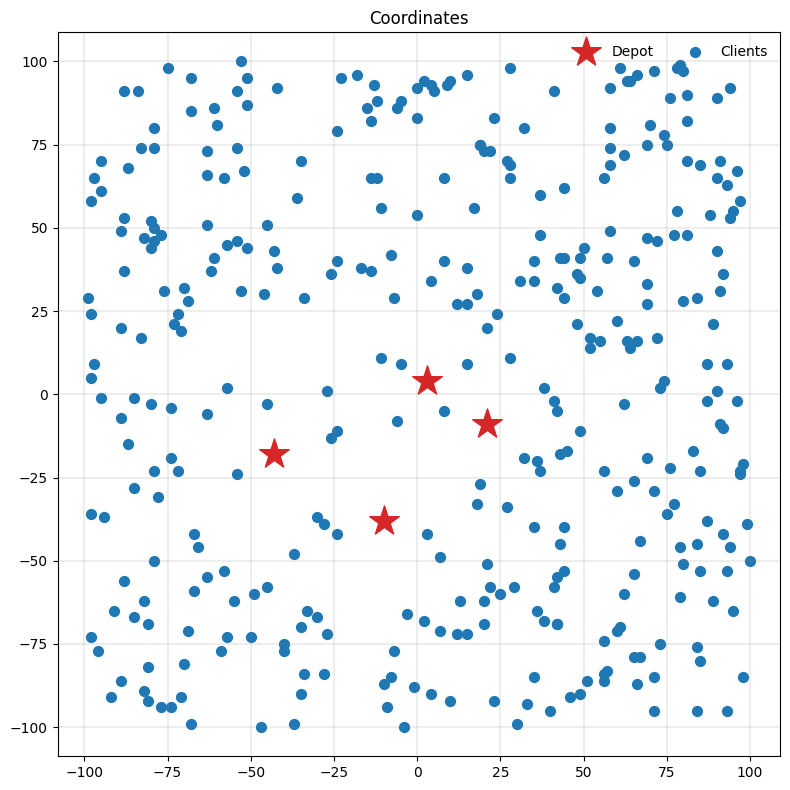

In [72]:
_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(INSTANCE, ax=ax)
plt.tight_layout()

In [34]:
model = Model.from_data(INSTANCE)
result = model.solve(stop=MaxIterations(1000), seed=0, display=True)
print(result)

PyVRP v0.10.1

Solving an instance with:
    1 depot
    100 clients
    100 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      2s |  56    27842    27591 |  48    27744    27450
     1000      3s |  62    27830    27591 |  55    27608    27415

Search terminated in 3.14s after 1000 iterations.
Best-found solution has cost 27591.

Solution results
    # routes: 26
   # clients: 100
   objective: 27591
    distance: 27591
    duration: 27591
# iterations: 1000
    run-time: 3.14 seconds

Solution results
    # routes: 26
   # clients: 100
   objective: 27591
    distance: 27591
    duration: 27591
# iterations: 1000
    run-time: 3.14 seconds

Routes
------
Route #1: 15 22 41 20 
Route #2: 1 70 54 
Route #3: 92 9 86 
Route #4: 68 90 84 66 
Route #5: 69 16 55 76 
Route #6: 74 13 4 
Route #7: 18 10 39 
Route #8: 25 65 78 42 28 
Route #9: 7 2 45 43 29 36 72 57 
Route #10: 14

In [35]:
gap = 100 * (result.cost() - BKS["cost"]) / BKS["cost"]
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {BKS['cost']}.")

Found a solution with cost: 27591.
This is 0.0% worse than the best known solution, which is 27591.


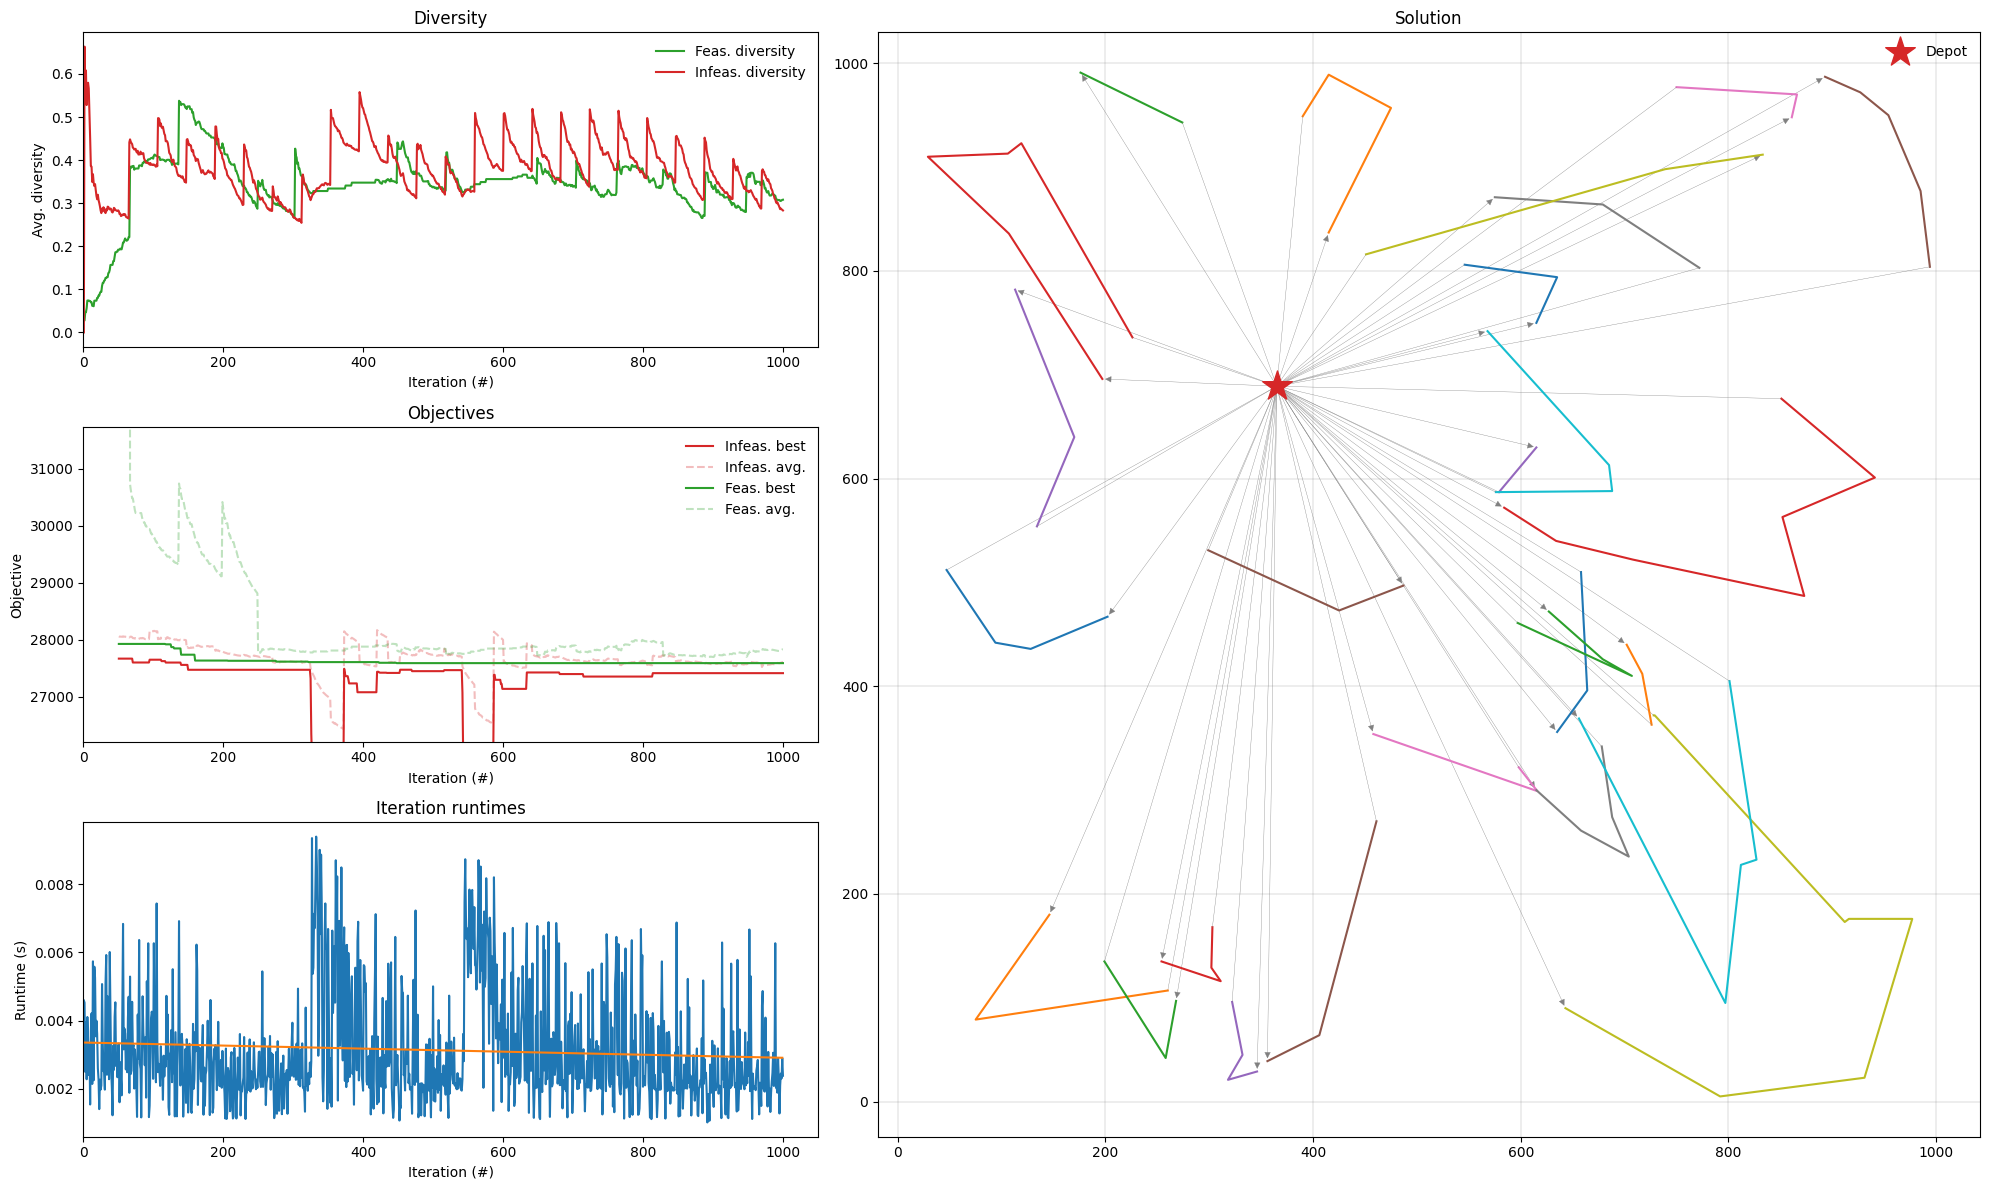

In [36]:
plot_result(result, INSTANCE)
plt.tight_layout()

In [52]:
# assume that instance file would be .vrp and solution file would be .sol
def solve_and_benchmark(instance_path, solution_path):
    # instance = read(f"../data/benchmark/CVRP/{instance_name}.vrp", round_func="round")
    # bks = read_solution(f"../data/benchmark/CVRP/{instance_name}.sol")

    instance = read(instance_path, round_func="round")
    bks = read_solution(solution_path)

    # visualize the model
    _, ax = plt.subplots(figsize=(8, 8))
    plot_coordinates(instance, ax=ax)
    plt.tight_layout()

    # solve using pyvrp
    model = Model.from_data(instance)
    result = model.solve(stop=MaxIterations(), seed=0, display=True)

    # benchmark
    gap = 100 * (result.cost() - BKS["cost"]) / BKS["cost"]
    print(f"This is {gap:.2f}% worse than the best known", end=" ")

    # visualize the result
    plot_result(result, instance)
    plt.tight_layout()
    
    

In [66]:
# assume that instance file would be .vrp and solution file would be .sol
def benchmark_cvrp(instance_path, solution_path):
    # instance = read(f"../data/benchmark/CVRP/{instance_name}.vrp", round_func="round")
    # bks = read_solution(f"../data/benchmark/CVRP/{instance_name}.sol")

    instance = read(instance_path, round_func="round")
    bks = read_solution(solution_path)

    # solve using pyvrp
    model = Model.from_data(instance)
    result = model.solve(stop=MaxIterations(10), seed=0, display=False)

    # benchmark
    gap = 100 * (result.cost() - BKS["cost"]) / BKS["cost"]
    print(f"{gap:.2f}%")
    
    

In [69]:
import os

def benchmark_all_cvrp(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith(".vrp"):
            instance_path = os.path.join(data_dir, filename)
            solution_filename = filename.replace(".vrp", ".sol")
            solution_path = os.path.join(data_dir, solution_filename)
            
            # print(f"🔍 Benchmarking {filename}")
            benchmark_cvrp(instance_path, solution_path)


In [68]:
benchmark_all_cvrp("../data/benchmark/CVRP/")

181.90%
1.61%
-2.36%
-44.92%
-51.50%
-49.28%
107.81%
9.43%
-59.32%
-48.86%
-38.42%
61.45%
-20.04%
-36.83%
-47.40%
-20.89%
69.93%
79.78%
-5.60%
-8.55%
-36.14%
65.30%
115.65%
-26.02%
16.82%
-57.82%
1114.57%
51.97%
-2.66%
-26.46%
4.35%
209.89%
504.36%
44.30%
-29.88%
2.47%
183.45%
32.71%
-20.60%
28.82%
-21.44%
256.22%
77.59%
32.37%
-16.83%
-2.20%
252.43%
185.91%
12.57%
6.11%
19.52%


KeyboardInterrupt: 